<a href="https://colab.research.google.com/github/prime1417/Analysis_Project_Ddareungi/blob/main/Ddareungi_data_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 주제
  - 서울시 공공자전거 '따릉이' 이용 현황 분석

분석 목표

- 따릉이 이용량 변화 패턴 파악, 특정 요일이나 시간대에 이용량이 급증하는 이유 분석
- 주요 대여소 위치 분석, 대여소 간 이동 패턴 시각화로 시민들의 주요 통행 경로 파악
- 날씨, 계절 같은 외부 요인이 이용량에 미치는 영향을 분석해 어떤 상황에 따릉이 수요가 늘어나는지 예측

활용 데이터

- 서울시 열린데이터광장, 따릉이 대여/반납 정보
- 기상청, 일일 기상 정보


# 데이터 준비단계

## 따릉이 데이터 가져오기

### 2024년 1월 데이터 통합

In [ ]:
## 2024년 1월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240101.csv to tpss_bcycl_od_statnhm_20240101.csv
Saving tpss_bcycl_od_statnhm_20240102.csv to tpss_bcycl_od_statnhm_20240102.csv
Saving tpss_bcycl_od_statnhm_20240103.csv to tpss_bcycl_od_statnhm_20240103.csv
Saving tpss_bcycl_od_statnhm_20240104.csv to tpss_bcycl_od_statnhm_20240104.csv
Saving tpss_bcycl_od_statnhm_20240105.csv to tpss_bcycl_od_statnhm_20240105.csv
Saving tpss_bcycl_od_statnhm_20240106.csv to tpss_bcycl_od_statnhm_20240106.csv
Saving tpss_bcycl_od_statnhm_20240107.csv to tpss_bcycl_od_statnhm_20240107.csv
Saving tpss_bcycl_od_statnhm_20240108.csv to tpss_bcycl_od_statnhm_20240108.csv
Saving tpss_bcycl_od_statnhm_20240109.csv to tpss_bcycl_od_statnhm_20240109.csv
Saving tpss_bcycl_od_statnhm_20240110.csv to tpss_bcycl_od_statnhm_20240110.csv
Saving tpss_bcycl_od_statnhm_20240111.csv to tpss_bcycl_od_statnhm_20240111.csv
Saving tpss_bcycl_od_statnhm_20240112.csv to tpss_bcycl_od_statnhm_20240112.csv
Saving tpss_bcycl_od_statnhm_20240113.cs

In [ ]:
import pandas as pd

ddareungi01 = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi01 = pd.concat([ddareungi01,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi01 = pd.concat([ddareungi01,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")



# ddareungi01.to_csv('ddareungi01.csv', index=False)

#### 2024년 1월 따릉이 데이터 통계분석

In [ ]:
import pandas as pd
ddareungi01 = pd.read_csv('ddareungi01.csv', parse_dates=['기준_날짜'])

ddareungi01.info()
ddareungi01.head()

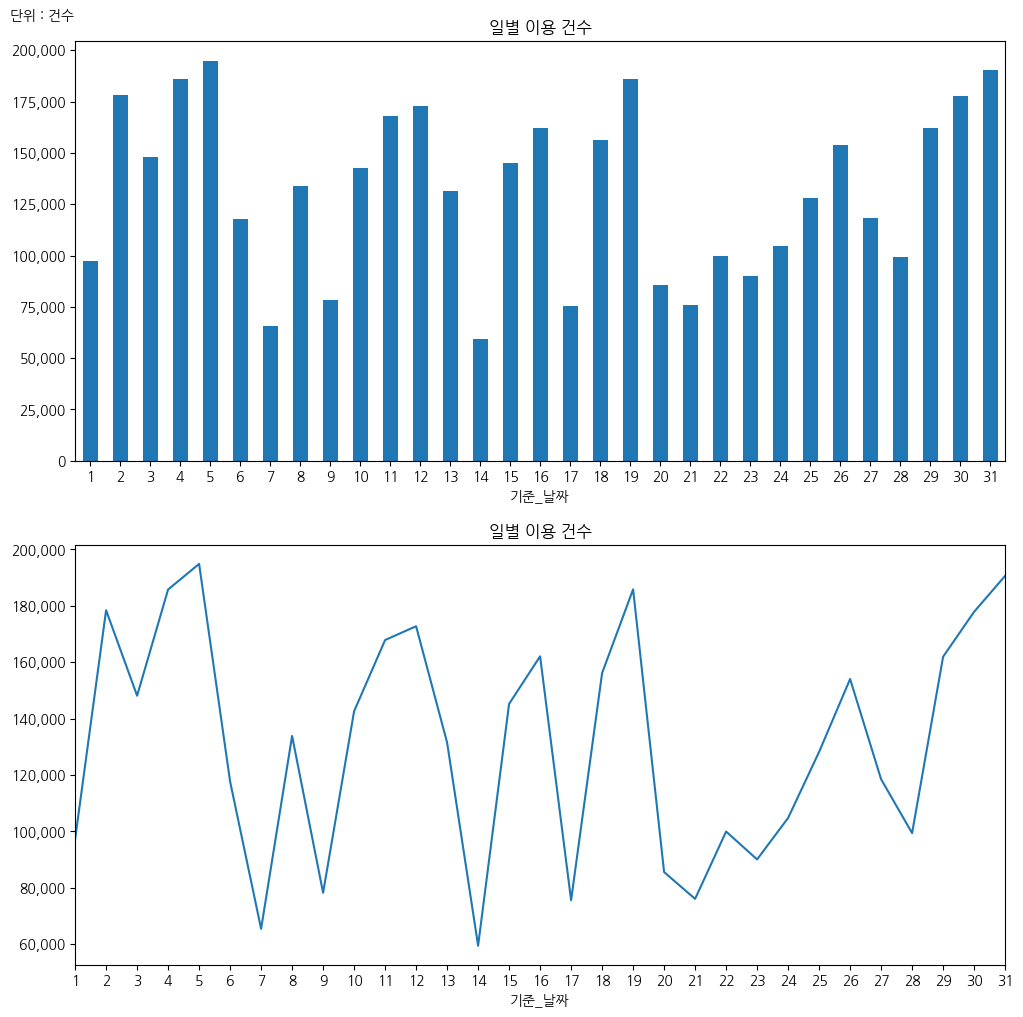

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267648 entries, 0 to 1267647
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   기준_날짜    1267648 non-null  datetime64[ns]
 1   시작_대여소명  1267648 non-null  object        
 2   종료_대여소명  1267648 non-null  object        
 3   전체_건수    1267648 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 38.7+ MB


In [ ]:
import datetime  as dt
#날짜 데이터의 data type 변환
ddareungi01['기준_날짜'] = pd.to_datetime(ddareungi01['기준_날짜'], format='%Y%m%d')
ddareungi01['기준_날짜'] # 변환 확인

import matplotlib.pyplot as plt
# 1. 일별 따릉이 이용 건수
day_number_of_uses = ddareungi01.groupby(['기준_날짜'])['전체_건수'].sum()


## 1-1. 일별 이용 건수 시각화(bar 그래프)
fig, ax = plt.subplots(2, 1,figsize=(12, 12))
day_number_of_uses.plot(kind='bar', ax=ax[0], title='일별 이용 건수')

# x축 눈금 레이블을 '기준_날짜'컬럼의 day로 표기하고, 정방향으로 돌리기
xlabel = ddareungi01['기준_날짜'].dt.day.drop_duplicates()
ax[0].set_xticklabels(xlabel, rotation=0)

# y축 범례(건수)에 자릿수 표기(,) 넣기
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# y축 범례 단위 '건' 표기 넣고, 위치를 y축 밖 상단 중앙에 놓기
ax[0].text(-0.07, 1.05, '단위 : 건수', rotation=0, transform=ax[0].transAxes)

## 1-2. 일별 이용 건수 시각화(line 그래프)
day_number_of_uses.plot(kind='line', ax=ax[1], title='일별 이용 건수')

# x축 눈금 레이블을 '기준_날짜'컬럼의 day로 표기
xlabel = ddareungi01['기준_날짜'].dt.day.drop_duplicates()
ax[1].set_xticks(day_number_of_uses.index)
ax[1].set_xticklabels(xlabel)

# y축 범례(건수)에 자릿수 표기(,) 넣기
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# 2. 일별 대여시작-대여종료 ID 별 이용 건수
day_place_uses = ddareungi01.groupby(['기준_날짜','시작_대여소명','종료_대여소명'], as_index=False)['전체_건수'].sum()
day_place_uses.query('전체_건수.max()')
day_place_uses.info()


### 2024년 2월 데이터 통합

In [ ]:
## 2024년 2월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240201.csv to tpss_bcycl_od_statnhm_20240201.csv
Saving tpss_bcycl_od_statnhm_20240202.csv to tpss_bcycl_od_statnhm_20240202.csv
Saving tpss_bcycl_od_statnhm_20240203.csv to tpss_bcycl_od_statnhm_20240203.csv
Saving tpss_bcycl_od_statnhm_20240204.csv to tpss_bcycl_od_statnhm_20240204.csv
Saving tpss_bcycl_od_statnhm_20240205.csv to tpss_bcycl_od_statnhm_20240205.csv
Saving tpss_bcycl_od_statnhm_20240206.csv to tpss_bcycl_od_statnhm_20240206.csv
Saving tpss_bcycl_od_statnhm_20240207.csv to tpss_bcycl_od_statnhm_20240207.csv
Saving tpss_bcycl_od_statnhm_20240208.csv to tpss_bcycl_od_statnhm_20240208.csv
Saving tpss_bcycl_od_statnhm_20240209.csv to tpss_bcycl_od_statnhm_20240209.csv
Saving tpss_bcycl_od_statnhm_20240210.csv to tpss_bcycl_od_statnhm_20240210.csv
Saving tpss_bcycl_od_statnhm_20240211.csv to tpss_bcycl_od_statnhm_20240211.csv
Saving tpss_bcycl_od_statnhm_20240212.csv to tpss_bcycl_od_statnhm_20240212.csv
Saving tpss_bcycl_od_statnhm_20240213.cs

In [ ]:
import pandas as pd

ddareungi02 = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi02 = pd.concat([ddareungi02,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi02 = pd.concat([ddareungi02,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 2월 각 일별 데이터 통합본을 저장
ddareungi02.to_csv('ddareungi02.csv', index=False)

### 2024년 3월 데이터 통합

In [ ]:
## 2024년 3월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240301.csv to tpss_bcycl_od_statnhm_20240301.csv
Saving tpss_bcycl_od_statnhm_20240302.csv to tpss_bcycl_od_statnhm_20240302.csv
Saving tpss_bcycl_od_statnhm_20240303.csv to tpss_bcycl_od_statnhm_20240303.csv
Saving tpss_bcycl_od_statnhm_20240304.csv to tpss_bcycl_od_statnhm_20240304.csv
Saving tpss_bcycl_od_statnhm_20240305.csv to tpss_bcycl_od_statnhm_20240305.csv
Saving tpss_bcycl_od_statnhm_20240306.csv to tpss_bcycl_od_statnhm_20240306.csv
Saving tpss_bcycl_od_statnhm_20240307.csv to tpss_bcycl_od_statnhm_20240307.csv
Saving tpss_bcycl_od_statnhm_20240308.csv to tpss_bcycl_od_statnhm_20240308.csv
Saving tpss_bcycl_od_statnhm_20240309.csv to tpss_bcycl_od_statnhm_20240309.csv
Saving tpss_bcycl_od_statnhm_20240310.csv to tpss_bcycl_od_statnhm_20240310.csv
Saving tpss_bcycl_od_statnhm_20240311.csv to tpss_bcycl_od_statnhm_20240311.csv
Saving tpss_bcycl_od_statnhm_20240312.csv to tpss_bcycl_od_statnhm_20240312.csv
Saving tpss_bcycl_od_statnhm_20240313.cs

In [ ]:
import pandas as pd

ddareungi03 = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi03 = pd.concat([ddareungi03,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi03 = pd.concat([ddareungi03,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 3월 각 일별 데이터 통합본을 저장
ddareungi03.to_csv('ddareungi03.csv', index=False)

### 2024년 4월 데이터 통합

In [ ]:
## 2024년 4월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240401.csv to tpss_bcycl_od_statnhm_20240401.csv
Saving tpss_bcycl_od_statnhm_20240402.csv to tpss_bcycl_od_statnhm_20240402.csv
Saving tpss_bcycl_od_statnhm_20240403.csv to tpss_bcycl_od_statnhm_20240403.csv
Saving tpss_bcycl_od_statnhm_20240404.csv to tpss_bcycl_od_statnhm_20240404.csv
Saving tpss_bcycl_od_statnhm_20240405.csv to tpss_bcycl_od_statnhm_20240405.csv
Saving tpss_bcycl_od_statnhm_20240406.csv to tpss_bcycl_od_statnhm_20240406.csv
Saving tpss_bcycl_od_statnhm_20240407.csv to tpss_bcycl_od_statnhm_20240407.csv
Saving tpss_bcycl_od_statnhm_20240408.csv to tpss_bcycl_od_statnhm_20240408.csv
Saving tpss_bcycl_od_statnhm_20240409.csv to tpss_bcycl_od_statnhm_20240409.csv
Saving tpss_bcycl_od_statnhm_20240410.csv to tpss_bcycl_od_statnhm_20240410.csv
Saving tpss_bcycl_od_statnhm_20240411.csv to tpss_bcycl_od_statnhm_20240411.csv
Saving tpss_bcycl_od_statnhm_20240412.csv to tpss_bcycl_od_statnhm_20240412.csv
Saving tpss_bcycl_od_statnhm_20240413.cs

In [ ]:
import pandas as pd

ddareungi04 = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi04 = pd.concat([ddareungi04,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi04 = pd.concat([ddareungi04,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 4월 각 일별 데이터 통합본을 저장
ddareungi04.to_csv('ddareungi04.csv', index=False)

### 2024년 5월 데이터 통합

In [ ]:
## 2024년 5월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240501.csv to tpss_bcycl_od_statnhm_20240501.csv
Saving tpss_bcycl_od_statnhm_20240502.csv to tpss_bcycl_od_statnhm_20240502.csv
Saving tpss_bcycl_od_statnhm_20240503.csv to tpss_bcycl_od_statnhm_20240503.csv
Saving tpss_bcycl_od_statnhm_20240504.csv to tpss_bcycl_od_statnhm_20240504.csv
Saving tpss_bcycl_od_statnhm_20240505.csv to tpss_bcycl_od_statnhm_20240505.csv
Saving tpss_bcycl_od_statnhm_20240506.csv to tpss_bcycl_od_statnhm_20240506.csv
Saving tpss_bcycl_od_statnhm_20240507.csv to tpss_bcycl_od_statnhm_20240507.csv
Saving tpss_bcycl_od_statnhm_20240508.csv to tpss_bcycl_od_statnhm_20240508.csv
Saving tpss_bcycl_od_statnhm_20240509.csv to tpss_bcycl_od_statnhm_20240509.csv
Saving tpss_bcycl_od_statnhm_20240510.csv to tpss_bcycl_od_statnhm_20240510.csv
Saving tpss_bcycl_od_statnhm_20240511.csv to tpss_bcycl_od_statnhm_20240511.csv
Saving tpss_bcycl_od_statnhm_20240512.csv to tpss_bcycl_od_statnhm_20240512.csv
Saving tpss_bcycl_od_statnhm_20240513.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 5월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi05.csv', index=False)

### 2024년 6월 데이터 통합

In [ ]:
## 2024년 6월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240601.csv to tpss_bcycl_od_statnhm_20240601.csv
Saving tpss_bcycl_od_statnhm_20240602.csv to tpss_bcycl_od_statnhm_20240602.csv
Saving tpss_bcycl_od_statnhm_20240603.csv to tpss_bcycl_od_statnhm_20240603.csv
Saving tpss_bcycl_od_statnhm_20240604.csv to tpss_bcycl_od_statnhm_20240604.csv
Saving tpss_bcycl_od_statnhm_20240605.csv to tpss_bcycl_od_statnhm_20240605.csv
Saving tpss_bcycl_od_statnhm_20240606.csv to tpss_bcycl_od_statnhm_20240606.csv
Saving tpss_bcycl_od_statnhm_20240607.csv to tpss_bcycl_od_statnhm_20240607.csv
Saving tpss_bcycl_od_statnhm_20240608.csv to tpss_bcycl_od_statnhm_20240608.csv
Saving tpss_bcycl_od_statnhm_20240609.csv to tpss_bcycl_od_statnhm_20240609.csv
Saving tpss_bcycl_od_statnhm_20240610.csv to tpss_bcycl_od_statnhm_20240610.csv
Saving tpss_bcycl_od_statnhm_20240611.csv to tpss_bcycl_od_statnhm_20240611.csv
Saving tpss_bcycl_od_statnhm_20240612.csv to tpss_bcycl_od_statnhm_20240612.csv
Saving tpss_bcycl_od_statnhm_20240613.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 6월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi06.csv', index=False)

### 2024년 7월 데이터 통합

In [ ]:
## 2024년 7월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240701.csv to tpss_bcycl_od_statnhm_20240701.csv
Saving tpss_bcycl_od_statnhm_20240702.csv to tpss_bcycl_od_statnhm_20240702.csv
Saving tpss_bcycl_od_statnhm_20240703.csv to tpss_bcycl_od_statnhm_20240703.csv
Saving tpss_bcycl_od_statnhm_20240704.csv to tpss_bcycl_od_statnhm_20240704.csv
Saving tpss_bcycl_od_statnhm_20240705.csv to tpss_bcycl_od_statnhm_20240705.csv
Saving tpss_bcycl_od_statnhm_20240706.csv to tpss_bcycl_od_statnhm_20240706.csv
Saving tpss_bcycl_od_statnhm_20240707.csv to tpss_bcycl_od_statnhm_20240707.csv
Saving tpss_bcycl_od_statnhm_20240708.csv to tpss_bcycl_od_statnhm_20240708.csv
Saving tpss_bcycl_od_statnhm_20240709.csv to tpss_bcycl_od_statnhm_20240709.csv
Saving tpss_bcycl_od_statnhm_20240710.csv to tpss_bcycl_od_statnhm_20240710.csv
Saving tpss_bcycl_od_statnhm_20240711.csv to tpss_bcycl_od_statnhm_20240711.csv
Saving tpss_bcycl_od_statnhm_20240712.csv to tpss_bcycl_od_statnhm_20240712.csv
Saving tpss_bcycl_od_statnhm_20240713.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 7월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi07.csv', index=False)

### 2024년 8월 데이터 통합

In [ ]:
## 2024년 8월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240801.csv to tpss_bcycl_od_statnhm_20240801.csv
Saving tpss_bcycl_od_statnhm_20240802.csv to tpss_bcycl_od_statnhm_20240802.csv
Saving tpss_bcycl_od_statnhm_20240803.csv to tpss_bcycl_od_statnhm_20240803.csv
Saving tpss_bcycl_od_statnhm_20240804.csv to tpss_bcycl_od_statnhm_20240804.csv
Saving tpss_bcycl_od_statnhm_20240805.csv to tpss_bcycl_od_statnhm_20240805.csv
Saving tpss_bcycl_od_statnhm_20240806.csv to tpss_bcycl_od_statnhm_20240806.csv
Saving tpss_bcycl_od_statnhm_20240807.csv to tpss_bcycl_od_statnhm_20240807.csv
Saving tpss_bcycl_od_statnhm_20240808.csv to tpss_bcycl_od_statnhm_20240808.csv
Saving tpss_bcycl_od_statnhm_20240809.csv to tpss_bcycl_od_statnhm_20240809.csv
Saving tpss_bcycl_od_statnhm_20240810.csv to tpss_bcycl_od_statnhm_20240810.csv
Saving tpss_bcycl_od_statnhm_20240811.csv to tpss_bcycl_od_statnhm_20240811.csv
Saving tpss_bcycl_od_statnhm_20240812.csv to tpss_bcycl_od_statnhm_20240812.csv
Saving tpss_bcycl_od_statnhm_20240813.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 8월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi08.csv', index=False)

### 2024년 9월 데이터 통합

In [ ]:
## 2024년 9월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240901.csv to tpss_bcycl_od_statnhm_20240901.csv
Saving tpss_bcycl_od_statnhm_20240902.csv to tpss_bcycl_od_statnhm_20240902.csv
Saving tpss_bcycl_od_statnhm_20240903.csv to tpss_bcycl_od_statnhm_20240903.csv
Saving tpss_bcycl_od_statnhm_20240904.csv to tpss_bcycl_od_statnhm_20240904.csv
Saving tpss_bcycl_od_statnhm_20240905.csv to tpss_bcycl_od_statnhm_20240905.csv
Saving tpss_bcycl_od_statnhm_20240906.csv to tpss_bcycl_od_statnhm_20240906.csv
Saving tpss_bcycl_od_statnhm_20240907.csv to tpss_bcycl_od_statnhm_20240907.csv
Saving tpss_bcycl_od_statnhm_20240908.csv to tpss_bcycl_od_statnhm_20240908.csv
Saving tpss_bcycl_od_statnhm_20240909.csv to tpss_bcycl_od_statnhm_20240909.csv
Saving tpss_bcycl_od_statnhm_20240910.csv to tpss_bcycl_od_statnhm_20240910.csv
Saving tpss_bcycl_od_statnhm_20240911.csv to tpss_bcycl_od_statnhm_20240911.csv
Saving tpss_bcycl_od_statnhm_20240912.csv to tpss_bcycl_od_statnhm_20240912.csv
Saving tpss_bcycl_od_statnhm_20240913.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 9월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi09.csv', index=False)

### 2024년 10월 데이터 통합

In [ ]:
## 2024년 10월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20241001.csv to tpss_bcycl_od_statnhm_20241001.csv
Saving tpss_bcycl_od_statnhm_20241002.csv to tpss_bcycl_od_statnhm_20241002.csv
Saving tpss_bcycl_od_statnhm_20241003.csv to tpss_bcycl_od_statnhm_20241003.csv
Saving tpss_bcycl_od_statnhm_20241004.csv to tpss_bcycl_od_statnhm_20241004.csv
Saving tpss_bcycl_od_statnhm_20241005.csv to tpss_bcycl_od_statnhm_20241005.csv
Saving tpss_bcycl_od_statnhm_20241006.csv to tpss_bcycl_od_statnhm_20241006.csv
Saving tpss_bcycl_od_statnhm_20241007.csv to tpss_bcycl_od_statnhm_20241007.csv
Saving tpss_bcycl_od_statnhm_20241008.csv to tpss_bcycl_od_statnhm_20241008.csv
Saving tpss_bcycl_od_statnhm_20241009.csv to tpss_bcycl_od_statnhm_20241009.csv
Saving tpss_bcycl_od_statnhm_20241010.csv to tpss_bcycl_od_statnhm_20241010.csv
Saving tpss_bcycl_od_statnhm_20241011.csv to tpss_bcycl_od_statnhm_20241011.csv
Saving tpss_bcycl_od_statnhm_20241012.csv to tpss_bcycl_od_statnhm_20241012.csv
Saving tpss_bcycl_od_statnhm_20241013.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 10월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi10.csv', index=False)

### 2024년 11월 데이터 통합

In [ ]:
## 2024년 11월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20241101.csv to tpss_bcycl_od_statnhm_20241101.csv
Saving tpss_bcycl_od_statnhm_20241102.csv to tpss_bcycl_od_statnhm_20241102.csv
Saving tpss_bcycl_od_statnhm_20241103.csv to tpss_bcycl_od_statnhm_20241103.csv
Saving tpss_bcycl_od_statnhm_20241104.csv to tpss_bcycl_od_statnhm_20241104.csv
Saving tpss_bcycl_od_statnhm_20241105.csv to tpss_bcycl_od_statnhm_20241105.csv
Saving tpss_bcycl_od_statnhm_20241106.csv to tpss_bcycl_od_statnhm_20241106.csv
Saving tpss_bcycl_od_statnhm_20241107.csv to tpss_bcycl_od_statnhm_20241107.csv
Saving tpss_bcycl_od_statnhm_20241108.csv to tpss_bcycl_od_statnhm_20241108.csv
Saving tpss_bcycl_od_statnhm_20241109.csv to tpss_bcycl_od_statnhm_20241109.csv
Saving tpss_bcycl_od_statnhm_20241110.csv to tpss_bcycl_od_statnhm_20241110.csv
Saving tpss_bcycl_od_statnhm_20241111.csv to tpss_bcycl_od_statnhm_20241111.csv
Saving tpss_bcycl_od_statnhm_20241112.csv to tpss_bcycl_od_statnhm_20241112.csv
Saving tpss_bcycl_od_statnhm_20241113.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 11월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi11.csv', index=False)

File tpss_bcycl_od_statnhm_20241127.csv could not be decoded with CP949. Trying a different encoding...


/tmp/ipython-input-3227133513.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ddareungi = pd.concat([ddareungi,df], axis=0)


### 2024년 12월 데이터 통합

In [ ]:
## 2024년 12월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20241201.csv to tpss_bcycl_od_statnhm_20241201.csv
Saving tpss_bcycl_od_statnhm_20241202.csv to tpss_bcycl_od_statnhm_20241202.csv
Saving tpss_bcycl_od_statnhm_20241203.csv to tpss_bcycl_od_statnhm_20241203.csv
Saving tpss_bcycl_od_statnhm_20241204.csv to tpss_bcycl_od_statnhm_20241204.csv
Saving tpss_bcycl_od_statnhm_20241205.csv to tpss_bcycl_od_statnhm_20241205.csv
Saving tpss_bcycl_od_statnhm_20241206.csv to tpss_bcycl_od_statnhm_20241206.csv
Saving tpss_bcycl_od_statnhm_20241207.csv to tpss_bcycl_od_statnhm_20241207.csv
Saving tpss_bcycl_od_statnhm_20241208.csv to tpss_bcycl_od_statnhm_20241208.csv
Saving tpss_bcycl_od_statnhm_20241209.csv to tpss_bcycl_od_statnhm_20241209.csv
Saving tpss_bcycl_od_statnhm_20241210.csv to tpss_bcycl_od_statnhm_20241210.csv
Saving tpss_bcycl_od_statnhm_20241211.csv to tpss_bcycl_od_statnhm_20241211.csv
Saving tpss_bcycl_od_statnhm_20241212.csv to tpss_bcycl_od_statnhm_20241212.csv
Saving tpss_bcycl_od_statnhm_20241213.cs

In [ ]:
import pandas as pd

ddareungi = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi = pd.concat([ddareungi,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi = pd.concat([ddareungi,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")

## 12월 각 일별 데이터 통합본을 저장
ddareungi.to_csv('ddareungi12.csv', index=False)

### 2024년 따릉이 통합 데이터

In [2]:
import pandas as pd

# 파일 경로 목록 생성
file_list = [f'ddareungi{i+1}.csv' for i in range(12)]

# 모든 CSV 파일을 리스트에 담아 한 번에 concat
## 메모리 문제로 필요 컬럼만
colname = ['기준_날짜','집계_기준','기준_시간대','시작_대여소명','종료_대여소명','전체_건수','전체_이용_분']
df = pd.concat([pd.read_csv(f, encoding='utf-8', low_memory=False, usecols=colname) for f in file_list], ignore_index=True)

df.to_pickle('ddareungi2024.pkl')
df.to_csv('ddareungi2024.csv', encoding='utf-8', index=False)

## 날씨 데이터 가져오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 강수량.csv to 강수량.csv
Saving 기온.csv to 기온.csv
Saving 습도.csv to 습도.csv
Saving 풍속.csv to 풍속.csv


### 날씨 데이터 통합

In [ ]:
import pandas as pd

# 2024년 1월 ~ 12월 일별 강수량 데이터
weather_precipitation = pd.read_csv('강수량.csv', encoding='EUC-KR', header=6, parse_dates=['날짜'])
weather_precipitation.rename(columns={'날짜':'일시', '지점':'지점번호'}, inplace=True)
weather_precipitation.info()
weather_precipitation.head()

# 2024년 1월 ~ 12월 일별 기온 데이터
weather_temper = pd.read_csv('기온.csv', encoding='EUC-KR', header=7, usecols=range(2,10,1), parse_dates=['일시'])
weather_temper.info()
weather_temper.head()

# 2024년 1월 ~ 12월 일별 습도 데이터
weather_humidity = pd.read_csv('습도.csv', encoding='EUC-KR', header=7, usecols=range(2,7,1), parse_dates=['일시'])
weather_humidity.info()
weather_humidity.head()

# 2024년 1월 ~ 12월 일별 풍속 데이터
weather_wind = pd.read_csv('풍속.csv', encoding='EUC-KR', header=7, usecols=range(2,12,1), parse_dates=['일시'])
weather_wind.info()
weather_wind.head()

li = [weather_temper, weather_humidity, weather_wind]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       366 non-null    datetime64[ns]
 1   지점번호     366 non-null    int64         
 2   강수량(mm)  160 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점번호     366 non-null    int64         
 1   지점명      366 non-null    object        
 2   일시       366 non-null    datetime64[ns]
 3   평균기온(℃)  366 non-null    float64       
 4   최고기온(℃)  366 non-null    float64       
 5   최고기온시각   366 non-null    object        
 6   최저기온(℃)  366 non-null    float64       
 7   최저기온시각   366 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1),

In [ ]:
## 세 개의 데이터셋을 ['지점번호', '지점명', '일시'] 컬럼으로 inner 통합
weather = pd.merge(weather_temper, weather_humidity, on=['지점번호', '지점명', '일시'], how='inner')
weather = pd.merge(weather, weather_wind, on=['지점번호', '지점명', '일시'], how='inner')

## 강수량 데이터는 weather에 ['일시','지점번호'] 컬럼으로 inner 통합
weather = pd.merge(weather, weather_precipitation, on=['일시','지점번호'], how='inner')
weather.info()
weather.head()
## 결측치 확인
weather.isna().any(axis=1)
weather[weather.isna().any(axis=1)]

## !!!!!!!!!!!!!!!!!!!!!!!!풍속, 강수량 결측치 확인해서 어떻게 채울지 생각하기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## 예시) 강수량의 결측치는 0으로 채우기
weather['강수량(mm)'].fillna(0, inplace=True)
weather.isna().any(axis=1)
weather[weather.isna().any(axis=1)]

# weather.to_csv('weather.csv', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점번호           366 non-null    int64         
 1   지점명            366 non-null    object        
 2   일시             366 non-null    datetime64[ns]
 3   평균기온(℃)        366 non-null    float64       
 4   최고기온(℃)        366 non-null    float64       
 5   최고기온시각         366 non-null    object        
 6   최저기온(℃)        366 non-null    float64       
 7   최저기온시각         366 non-null    object        
 8   평균습도(%rh)      366 non-null    float64       
 9   최저습도(%rh)      366 non-null    int64         
 10  평균풍속(m/s)      363 non-null    float64       
 11  최대풍속(m/s)      364 non-null    float64       
 12  최대풍속풍향(deg)    364 non-null    float64       
 13  최대풍속시각         364 non-null    object        
 14  최대순간풍속(m/s)    364 non-null    float64       
 15  최대순간풍속풍향(deg)  364 non-

/tmp/ipython-input-1993371323.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['강수량(mm)'].fillna(0, inplace=True)


### 2024년 1월 일별 강수량 통계분석

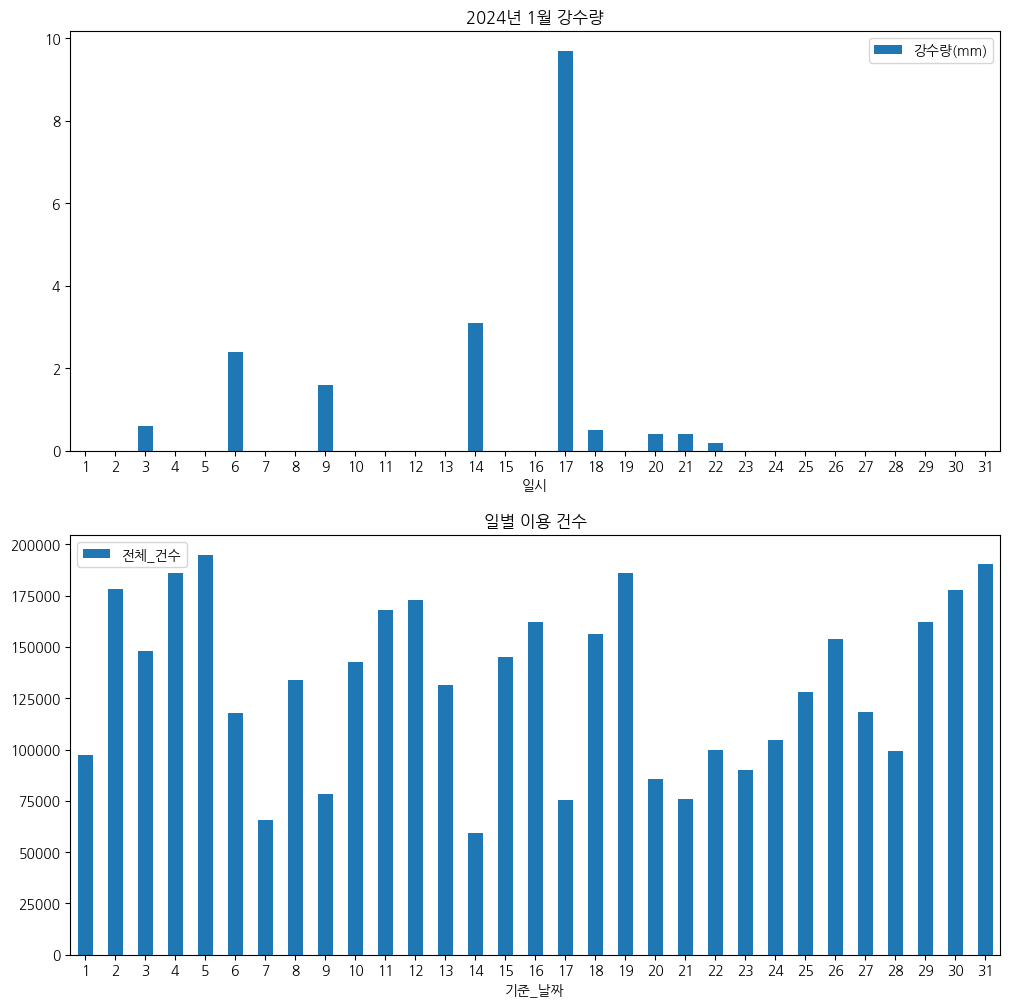

In [ ]:
## 2024년 1월 강수량 데이터
weather_pre_01 = weather[['일시','강수량(mm)']].query('일시 >= "2024-01-01" and 일시 < "2024-02-01"')

## 일별 강수량 시각화
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
weather_pre_01.plot(x='일시', y='강수량(mm)', kind='bar', ax=ax[0], title='2024년 1월 강수량')
xlabel = weather_pre_01['일시'].dt.day.drop_duplicates()
ax[0].set_xticklabels(xlabel, rotation=0)

# 일별 따릉이 이용 건수
day_number_of_uses = ddareungi01.groupby(['기준_날짜'], as_index=False)['전체_건수'].sum()
day_number_of_uses.plot(x='기준_날짜' ,y='전체_건수' ,kind='bar', ax=ax[1], title='일별 이용 건수')
xlabel = ddareungi01['기준_날짜'].dt.day.drop_duplicates()
ax[1].set_xticklabels(xlabel, rotation=0)
plt.show()

#Seaborn 깨짐 방지

In [ ]:
# -----------------------------------------------------
# 1. 나눔 폰트 설치 (Colab 환경에 따라 시간이 좀 걸릴 수 있습니다.)
# -----------------------------------------------------
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv # 폰트 캐시 갱신
!rm ~/.cache/matplotlib -rf # Matplotlib 캐시 삭제 (필수)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and direc

폰트 설정 완료! 이제 한글이 제대로 표시될 것입니다.


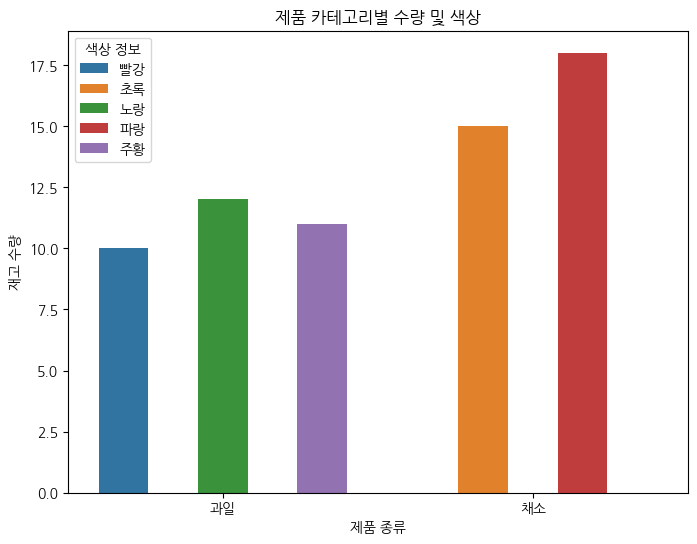

In [ ]:

# -----------------------------------------------------
# 2. 런타임 다시 시작 (매우 중요!)
# -----------------------------------------------------
# 위에 폰트 설치 코드를 실행한 후, 반드시 런타임을 다시 시작해야 합니다.
# 런타임 > 런타임 다시 시작 (Ctrl + M)

# -----------------------------------------------------
# 3. Matplotlib 폰트 설정 (런타임 재시작 후 이 셀부터 다시 실행)
# -----------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("폰트 설정 완료! 이제 한글이 제대로 표시될 것입니다.")

# -----------------------------------------------------
# 4. 예시 데이터 및 그래프 (한글 확인)
# -----------------------------------------------------
data = {
    '카테고리': ['과일', '채소', '과일', '채소', '과일'],
    '수량': [10, 15, 12, 18, 11],
    '색상': ['빨강', '초록', '노랑', '파랑', '주황']
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(x='카테고리', y='수량', hue='색상', data=df)
plt.title('제품 카테고리별 수량 및 색상')
plt.xlabel('제품 종류')
plt.ylabel('재고 수량')
plt.legend(title='색상 정보')
plt.show()